**Анализ оттока клиентов банка "Метанпромбанк"**

**Задача:**

**Анализ клиентов регионального банка и выделение сегментов, которые склонны уходить**

**Основные этапы:**
- Проведение исследовательского анализа данных, определение признака отточности (интервалы значений характеристик, которые связаны с повышеным оттоком; сравнение портретов типичных клиентов, склонных и не склонных к уходу)
- Формулировка и проверка статистических гипотез (различие в доходах между ушедшими и оставшимися клиентами; анализ имеющихся данных, который поможет внести ясность в исследование)
- Объединение признаков отточности, формирование сегментов и отбор лучших из них; рекомендации по работе с выбранными сегментами
- Подготовка презентации

**Последовательность выполнения работ:**

1. Загрузка и описание данных


2. Подготовка данных:
- проверка на явные и неявные дубликаты
- проверка на пропуски
- проверка типов данных
- редактирование названий столбцов
- кодирование (для использования в анализе корреляции данных по полу и городу)

3. Исследовательский анализ данных
- анализ распределения признаков, в т. ч. в разрезе отточности
зависимость оттока от банковского скорринга, возраста, баланса, уровня дохода (расчеты, графики, вывод)
зависимость оттока от количества города, пола, собственности, количества продуктов, наличия кредитных карт, последней активности (расчеты, графики, вывод)
- корреляционный анализ оттока по признакам с интрепретацией
- матрица корреляции
- вывод

4. Проверка статистических гипотез
- проверка гипотезы о различии доходов между ушедшими и оставшимися клиентами, включая обоснование метода проверки
- формирование гипотезы
- обоснование метода проверки
- проверка гипотезы
- вывод
- проверка дополнительной гипотезы по результатам сегментирования, включая обоснование метода проверки
- формирование гипотезы
- обоснование метода проверки
- проверка гипотезы
- вывод

5. Подведение промежуточных итогов
- выводы по результатам исследовательского анализа, корреляционного анализа и гипотез
- выделение признаков, влияющих на отток

6. Сегментация клиентов
- выделение сегментов
- портрет клиента 

7.  Приоритизация сегментов


8. Формирование рекомендаций по работе с приоритетными сегментами

**Описание исходных данных**

**Датасет содержит данные о клиентах банка «Метанпромбанк». 
Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск**

**Колонки:**

- USERID - идентификатор пользователя
- score - баллы кредитного скоринга,
- city - город,
- gender - пол,
- age - возраст,
- equity - количество баллов собственности
- balance - баланс на счёте,
- products - количество продуктов, которыми пользуется клиент,
- credit_card - есть ли кредитная карта,
- last_activity - активный клиент,
- EST_SALARY - оценочный доход клиента,
- churn - признак оттока.

### Загрузка и описание данных

In [1]:
pip install phik

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/667.1 kB ? eta -:--:--
   ---------------------------------------- 667.1/667.1 kB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Загрузка библиотек
import pandas as pd
import numpy as np
from math import sqrt
from scipy import stats as st
from scipy.stats import binom
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import matplotlib.ticker as ticker
import phik
from phik import report
from phik import resources
from phik.report import plot_correlation_matrix

In [3]:
# Загрузка данных
try:
    data = pd.read_csv('C:\\Users\\User\\Desktop\\My_Jupiter\\Проект Анализ оттока клиентов\\bank_scrooge.csv')
    
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [4]:
# Знакомство с данными
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
# Выведем информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


**Вывод об исходных данных:**

- В датасете 10 000 строк, 12 колонок
- Пропущены значения в age, balance
- Типы данных: int - 6 колонок, float - 4 колонки, object - 2 колонки

### Подготовка данных

In [7]:
# Приведем названия колонок к нижнему регистру
data.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace =True)
data.head()


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [8]:
# Проверим на явные дубликаты
data.duplicated().sum()

0

In [9]:
# Проверим на неявные дубликаты по столбцам user_id/city
duplicates = data.duplicated(subset=['user_id', 'city'], keep='first')
duplicates.sum()

0

In [10]:
# Проверим на неявные дубликаты по столбцам user_id
duplicates = data.duplicated(subset=['user_id'], keep='first')
duplicates.sum()

73

In [11]:
# Удалим дубликаты, т. к. таких строк всего 73
data = data.dropna(subset = ['user_id'])

#### Проверка пропусков. В части пропусков воспользуемся общепринятой классификацией пропусков:
        
- MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными;
- MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать;
- MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.


 



##### Анализируем пропуски в balance

In [12]:
# Проверим есть ли строки с нулевым балансом
display(data.query('balance==0').count())

user_id          2
score            2
city             2
gender           2
age              2
equity           2
balance          2
products         2
credit_card      2
last_activity    2
est_salary       2
churn            2
dtype: int64

In [13]:
# Выделим клиентов с пропущенным балансом
data_balance =  data.query('balance.isna()')
data_balance.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0


In [14]:
# Посчитаем количество банковских продуктов у таких клиентов
data_balance.groupby('products')['products'].count()

products
0       1
1    1950
2     315
3      29
Name: products, dtype: int64

In [15]:
# Посчитаем количество кредитных карт у таких клиентов
data_balance.groupby('credit_card')['credit_card'].count()

credit_card
0     423
1    1872
Name: credit_card, dtype: int64

**Вывод:**
- Клиенты с пропусками в балансе имеют всего один банковский продукт и это в подавляющем большинстве кредитная карта, поэтому возможно их баланс нулевой, т. к. нет дебетовой карты, но необходимо проверить другие признаки


##### Построим матрицу корреляции по пропущенным значениям

In [16]:
# Создадим бинарный признак наличия пропусков в столбце 'balance'
data['balance_missing'] = data['balance'].isnull().astype(int)
data.head()    

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0


In [17]:
# Удалим столбец user_id
data_not_id = data.drop(columns=['user_id'])

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'balance_missing']


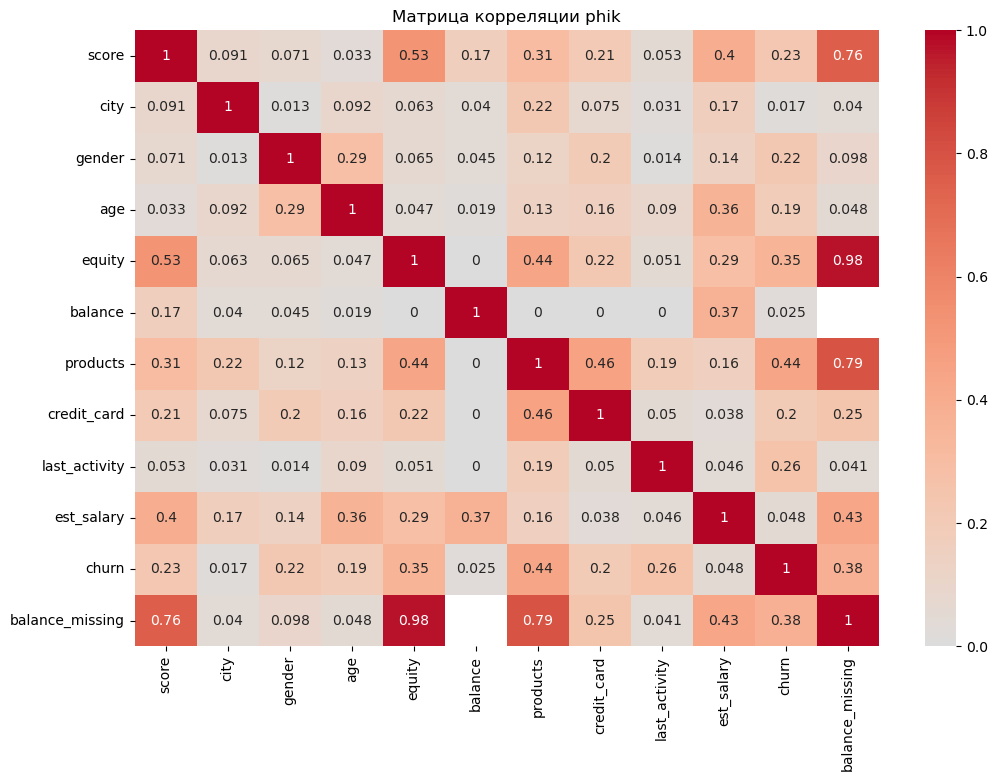

In [18]:
# Расчет матрицы корреляции phik
phik_matrix = data_not_id.phik_matrix()

# Визуализация матрицы корреляции в виде тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, center=0, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Матрица корреляции phik')
plt.show()

**Вывод по пропускам:**

Сильная корреляция

- количество баллов собственности: 0.98
- количество банковских продуктов: 0.79
- кредитный рейтинг: 0.75

Умеренная корреляция

- доходы: 0.43
- отток: 0.38
- кредитная карта: 0.24


Сильная корреляция по количеству банковских продуктов и умеренная корреляция по кредитной карте говорит о том, что клиенты с пропусками в балансе часто имеют всего один банковский продукт, но не обязательно, что это только кредитная карта. 

Пропуски в балансе примем как MNAR

На основании проведенного анализа и высоких корреляций можно сделать вывод, что заполнение пропусков нулем не является правильной стратегией.  


**Пропуск в age примем как MCAR, т. к. вероятно это случайная ошибка при заполнении, таких строк немного, то можно  удалить эти строки**



In [19]:
# Удалим пропуски в age
data.dropna(subset=['age'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          9974 non-null   int64  
 1   score            9974 non-null   float64
 2   city             9974 non-null   object 
 3   gender           9974 non-null   object 
 4   age              9974 non-null   float64
 5   equity           9974 non-null   int64  
 6   balance          7695 non-null   float64
 7   products         9974 non-null   int64  
 8   credit_card      9974 non-null   int64  
 9   last_activity    9974 non-null   int64  
 10  est_salary       9974 non-null   float64
 11  churn            9974 non-null   int64  
 12  balance_missing  9974 non-null   int32  
dtypes: float64(4), int32(1), int64(6), object(2)
memory usage: 1.0+ MB


**Выводы после обработки данных:**

- Обновленный датасет содержит 9974 строки, 12 колонок
- Типы данных не меняли
- Удалили дубликаты в user_id
- Удалили пропуски в age
- Оставили пропуски в balance 

### Исследовательский анализ данных

#### Анализ распределения признаков, в т. ч. в разрезе отточности

##### Построим гистограмму распределения по баллам кредитного скорринга  

In [20]:
# Подберем оптимальный размер корзин
max_score = data['score'].max()
min_score = data['score'].min()
binwidth = (max_score - min_score) / 30 # Количество корзин, например 30


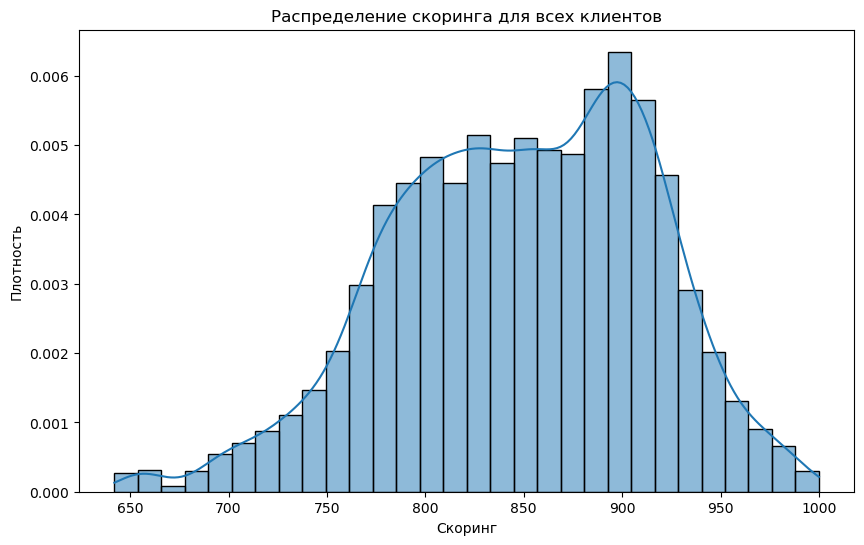

In [21]:
# Построим гистограмму без разделения на отток 
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='score', stat="density", binwidth=binwidth, kde=True)

plt.title('Распределение скоринга для всех клиентов')
plt.xlabel('Скоринг')
plt.ylabel('Плотность')
plt.show()

**Вывод:**
Гистограмма по всем клиентам имеет плато на уровне 800-870 баллов и небольшой всплек на уровне 900 баллов

In [22]:
# Разделим клиентов на ушедших и оставшихся
churned = data.query('churn==1')
stayed = data.query('churn==0')
display(churned.head())
display(stayed.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0
12,132970,845.0,Ярославль,Ж,31.0,3,591928.52,2,1,1,112697.16,1,0
40,129705,811.0,Рыбинск,М,34.0,2,129799.35,1,0,0,96242.71,1,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0,0


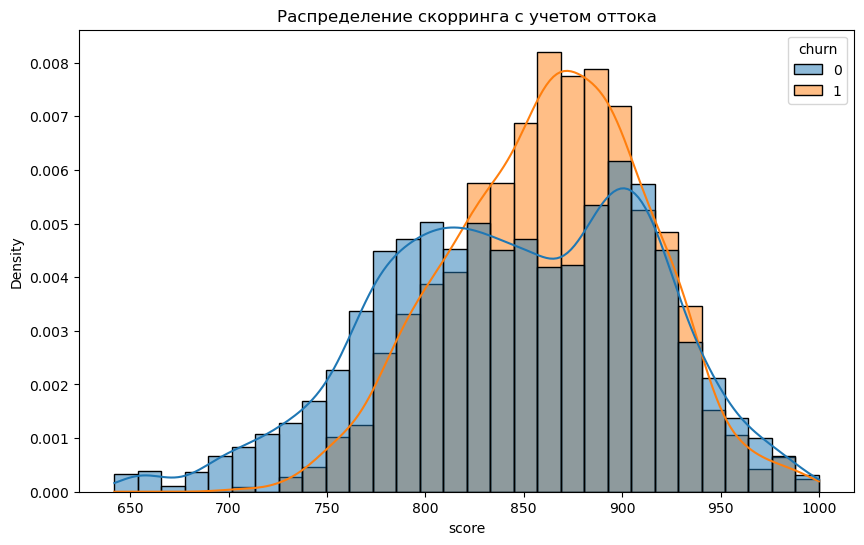

In [23]:
# Построим гистограмму по скорингу в разрезе по оттоку
plt.figure(figsize=(10, 6)) 
sns.histplot(data=data, x='score', hue='churn', stat="density", common_norm=False, binwidth=binwidth, kde=True)
plt.title('Распределение скорринга с учетом оттока')
plt.show()

**Вывод:**
- Для оставшихся клиентов большая доля имеет кредитный рейтинг 780-820 баллов, затем небольшой провал на уровне 850-880 баллов и далее небольшой всплеск на уровне 930 баллов. 
- Для ушедших клиентов имеем явный пик в районе 855-900 баллов

##### Построим гистограмму распределения по возрасту  

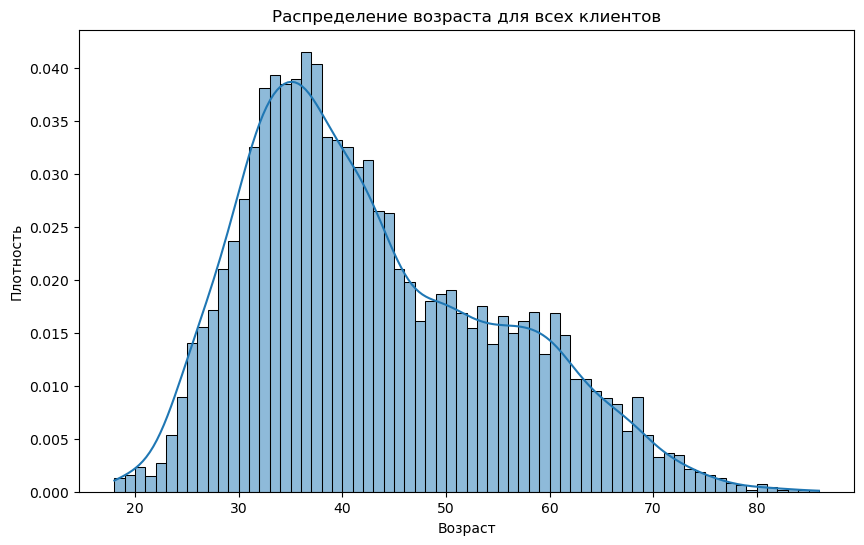

In [24]:
# Построим гистограмму без разделения на отток 
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', stat="density", binwidth=1, kde=True)

plt.title('Распределение возраста для всех клиентов')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.show()

**Вывод:**
- На графике видно что наибольшая возрастная категория клиентов 30-45 лет, на втором месте категория 50-60 лет

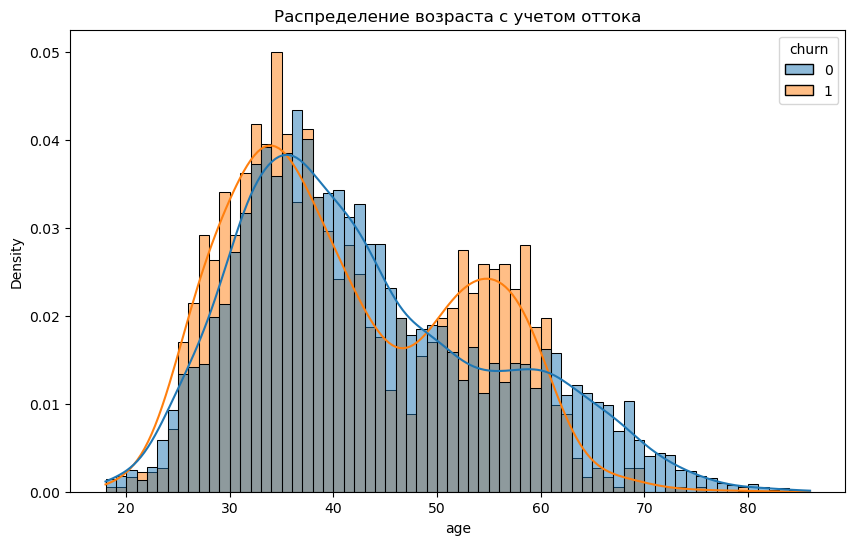

In [25]:
# Построим гистограмму по возрасту в разрезе оттока
plt.figure(figsize=(10, 6)) 
sns.histplot(data=data, x='age', hue='churn', stat="density", common_norm=False, binwidth=1, kde=True)
plt.title('Распределение возраста с учетом оттока')
plt.show()

**Вывод:**
- График распределения возраста для оставшихся клиентов очень похож на распределение для всех клиентов банка: наибольшая возрастная категория клиентов 30-45 лет, на втором месте категория 50-65 лет
- Для ушедших клиентов характерно два пика - 30-40 лет и 50-60 лет, для 40-50 летних видим провал

##### Построим гистограмму распределения по балансу на счете 

In [26]:
# Посмотрим основные статистики
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data['balance'].describe()

count        7695.00
mean       827245.59
std       1980327.41
min             0.00
25%        295698.71
50%        524295.33
75%        980051.21
max     119113552.01
Name: balance, dtype: float64

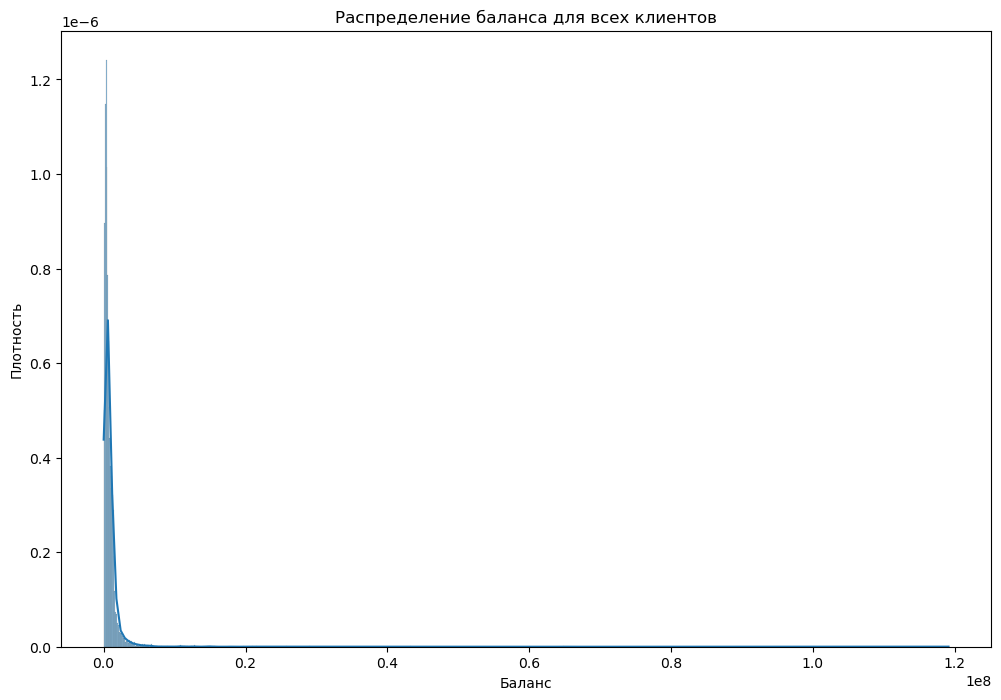

In [27]:
# Построим гистограмму без разделения на отток с учетом выбросов
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='balance', stat="density", binwidth=100000, kde=True)

plt.title('Распределение баланса для всех клиентов')
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.show()

**Вывод:**
Существует большой разброс значений, для более наглядной картины удалим верхние и нижние выбросы

In [28]:
# Посчитаем 5 % и 95 % перцентили по балансу
x_05 = data['balance'].quantile(.05)
x_95 = data['balance'].quantile(.95)
display(x_05) 
display(x_95)
      

100057.46200000001

2114078.393999996

In [29]:
# Создадим временный датафрейм без выбросов
data_balance_temp = data[(data['balance'] >= x_05) & (data['balance'] <= x_95)]


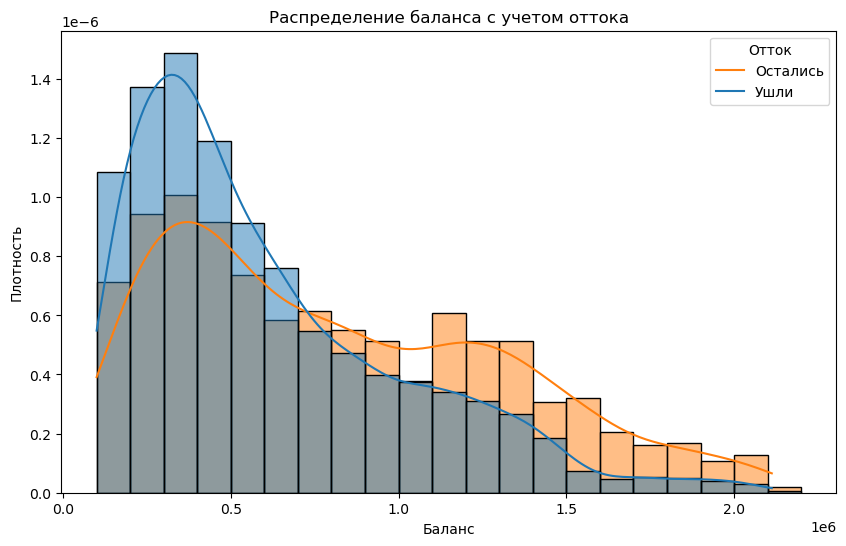

In [30]:
# Построим гистограмму с учетом оттока
plt.figure(figsize=(10, 6))
sns.histplot(data=data_balance_temp, x='balance', hue='churn', stat="density", common_norm=False, binwidth=100000, kde=True)
plt.title('Распределение баланса с учетом оттока')
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.legend(title='Отток', labels=['Остались', 'Ушли'])
plt.show()

**Вывод:**
Ушедшие клиенты имеют больший баланс по сравнению с оставшимися

##### Построим гистограмму распределения по зарплате клиента 

In [31]:
# Посмотрим основные метрики
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data['est_salary'].describe()

count      9974.00
mean     147786.81
std      139285.51
min        2546.30
25%       75251.66
50%      119626.79
75%      174499.81
max     1395064.45
Name: est_salary, dtype: float64

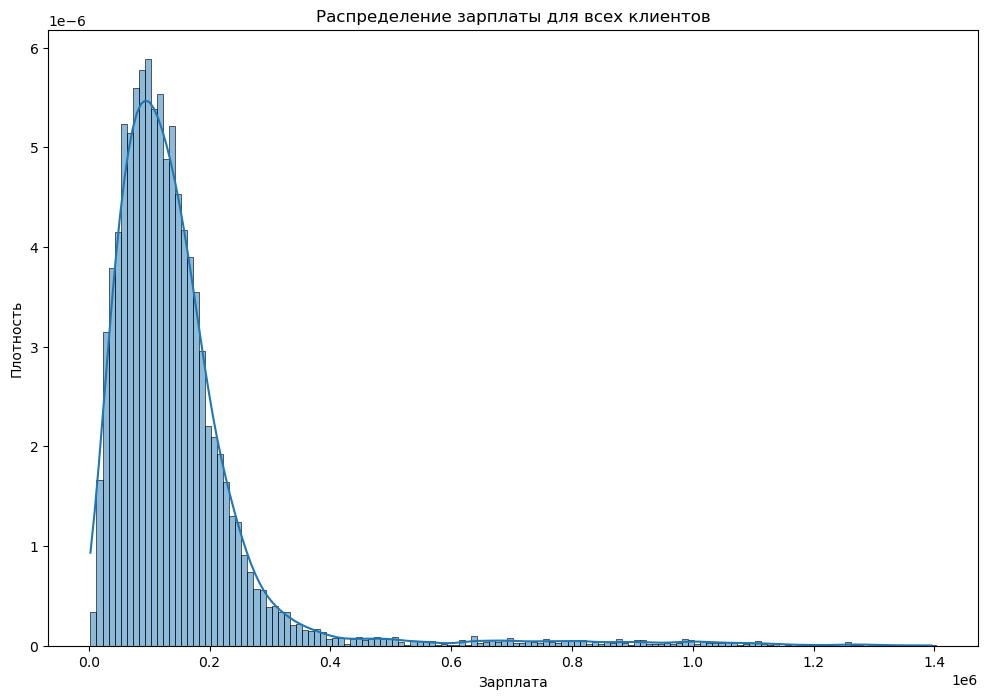

In [32]:
# Построим гистограмму без разделения на отток с учетом выбросов
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='est_salary', stat="density", binwidth=10000, kde=True)

plt.title('Распределение зарплаты для всех клиентов')
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.show()

**Вывод:**
Зарплата клиентов в основном в диапазоне 50000 - 150000 рублей, есть небольшая доля клиентов с очень большой зарплатой - более 400000 рублей    

**Вывод:**
Существует большой разброс значений, для более наглядной картины удалим верхние и нижние выбросы

In [33]:
# Посчитаем 5 % и 95 % перцентили по зарплате
x_05 = data['est_salary'].quantile(.05)
x_95 = data['est_salary'].quantile(.95)
display(x_05)
display(x_95)

32080.855000000003

316360.58150000003

In [34]:
# Создадим временный датафрейм без выбросов
data_salary_temp = data[(data['est_salary'] >= x_05) & (data['est_salary'] <= x_95)]

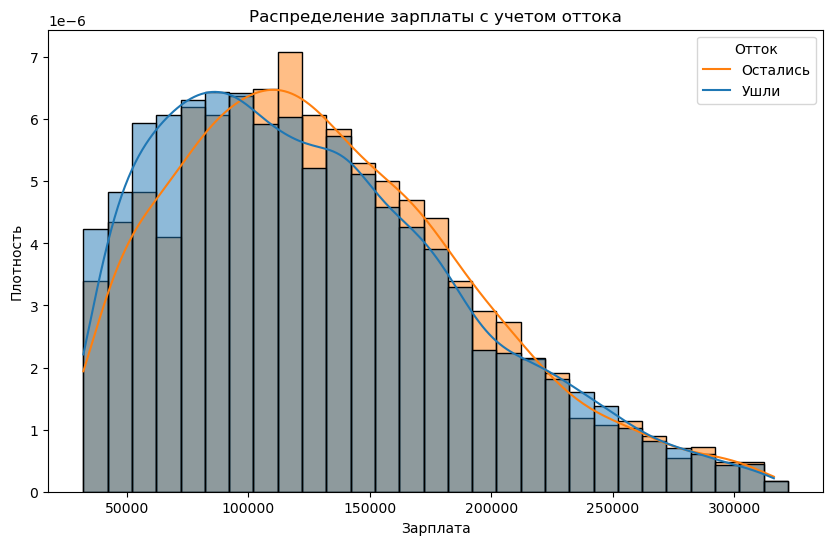

In [35]:
# Построим гистограмму с учетом оттока
plt.figure(figsize=(10, 6))
sns.histplot(data=data_salary_temp, x='est_salary', hue='churn', stat="density", common_norm=False, binwidth=10000, kde=True)
plt.title('Распределение зарплаты с учетом оттока')
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.legend(title='Отток', labels=['Остались', 'Ушли'])
plt.show()

**Вывод:**
По графикам зарплаты ушедших и оставшихся клиентов почти на одном уровне, необходимо дополнительное исследование

##### Построим столбчатую диаграмму по городам в разрезе оттока 

In [36]:
def pivot_table (df, column):
    
    """Эта функция для создания сводной таблицы расчета относительного количества ушедших и оставшихся клиентов
       принимает на вход:
       df - датафрейм 
       column - признак, по которому считаем количество ушедших и оставшихся клиентов
       """
    table = df.pivot_table(index=column, columns='churn', values='user_id', aggfunc='count').reset_index()
    table.columns = [column, 'stay', 'churn']
    table['total'] = table['stay']+table['churn']
    table['stay_perc'] = table['stay']/table['total']*100
    table['churn_perc'] = table['churn']/table['total']*100
    return table       

In [37]:
def plot_2_bar(df, churn_perc, stay_perc, name_title, name_col):
    
    """Эта функция для построения двойного барплота для ушедших и оставшихся клиентов с указанием среднего значения
       принимает на вход:
       churned_df - датафрейм по ушедшим клиентам
       stayed_df - датафрейм по оставшимся клиентам
       churn_col - столбец с количеством ушедших клиентов
       stay_col - столбец с количеством оставшихся клиентов
       name_col - столбец по которому делаем группировку
       name_title - подпись
       """
    # Рассчитаем среднее значение churn для всех значений
    df_mean = df[churn_perc].mean()

    # Задаем ширину столбцов
    bar_width = 0.35

    # Задаем положение столбцов на оси x
    x = np.arange(len(df[churn_perc]))

    # Построение двойной столбчатой диаграммы
    fig, ax = plt.subplots(figsize=(10, 6))

    # Построение столбцов
    rects1 = ax.bar(x - bar_width/2, df[churn_perc], width=bar_width, label='Ушли', color='skyblue')
    rects2 = ax.bar(x + bar_width/2, df[stay_perc], width=bar_width, label='Остались', color='lightgreen')

    # Добавление средней линии
    ax.axhline(df_mean, color='red', linestyle='--', linewidth=1, label='Среднее значение ушедших клиентов')

    # Добавление подписей
    ax.set_xlabel(name_title)
    ax.set_ylabel('Количество клиентов в %')
    ax.set_title(f"Количество клиентов по {name_title}")
    ax.set_xticks(x)
    ax.set_xticklabels(df[name_col])
    ax.legend()

In [38]:
# Постороим сводную таблицу по городам
city = pivot_table(data, 'city')
city

,city,stay,churn,total,stay_perc,churn_perc
0,Ростов,1151,265,1416,81.29,18.71
1,Рыбинск,2246,437,2683,83.71,16.29
2,Ярославль,4758,1117,5875,80.99,19.01


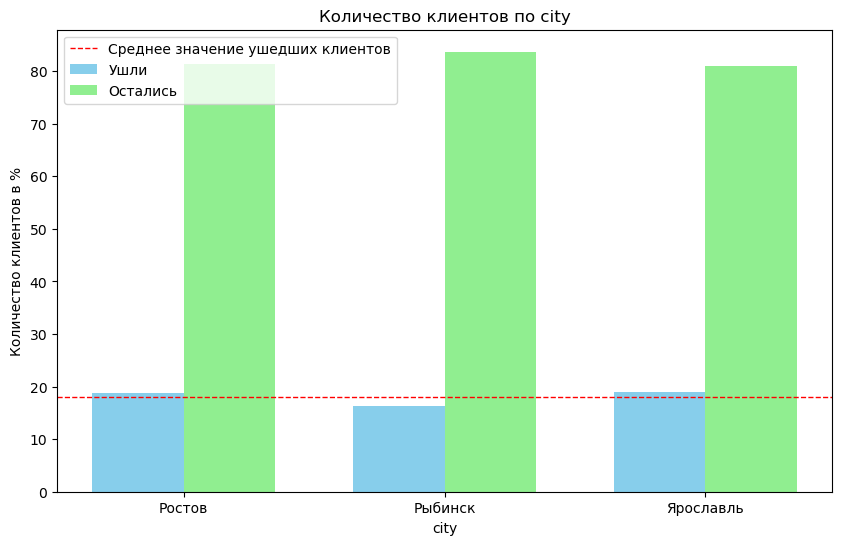

In [39]:
# Построим барплот по клиентам
plot_2_bar(city, 'churn_perc', 'stay_perc', 'city', 'city')

**Вывод:**
Уровень оттока во всех городах равен уровню среднего оттока по банку

##### Построим столбчатую диаграмму по полу в разрезе оттока 

In [40]:
# Создадим сводную таблицу по полу в разрезе оттока
gender = pivot_table(data, 'gender')
gender

,gender,stay,churn,total,stay_perc,churn_perc
0,Ж,4347,636,4983,87.24,12.76
1,М,3808,1183,4991,76.30,23.70


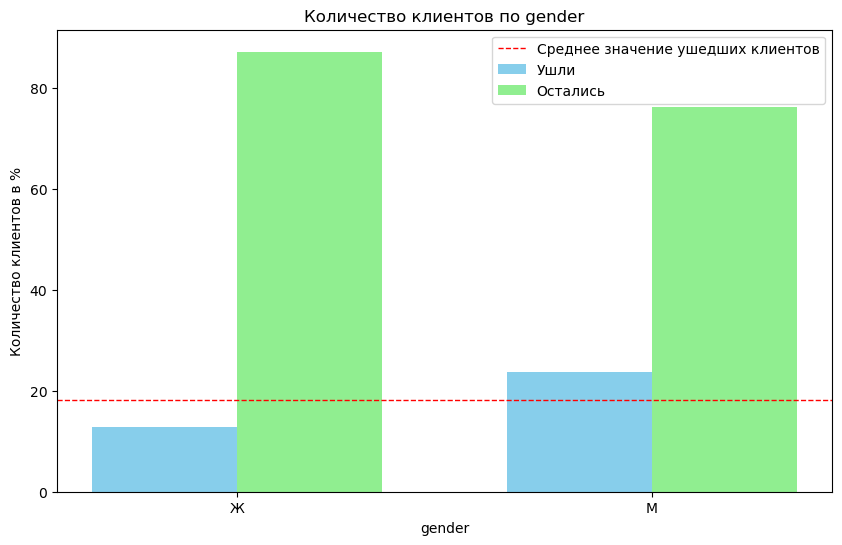

In [41]:
# Построим барплот по гендеру
plot_2_bar(gender, 'churn_perc', 'stay_perc', 'gender', 'gender')

**Вывод:**
Уровень оттока мужчин выше среднего уровня оттока по банку

##### Построим столбчатую диаграмму по количеству баллов собственности в разрезе оттока 

In [42]:
# Создадим сводную таблицу по количеству баллов собственности в разрезе оттока
equity = pivot_table(data, 'equity')
equity


,equity,stay,churn,total,stay_perc,churn_perc
0,0,2486,90,2576,96.51,3.49
1,1,680,93,773,87.97,12.03
2,2,885,166,1051,84.21,15.79
3,3,1219,322,1541,79.10,20.90
4,4,1383,464,1847,74.88,25.12
5,5,1339,576,1915,69.92,30.08
6,6,103,58,161,63.98,36.02
7,7,43,37,80,53.75,46.25
8,8,11,6,17,64.71,35.29
9,9,6,7,13,46.15,53.85


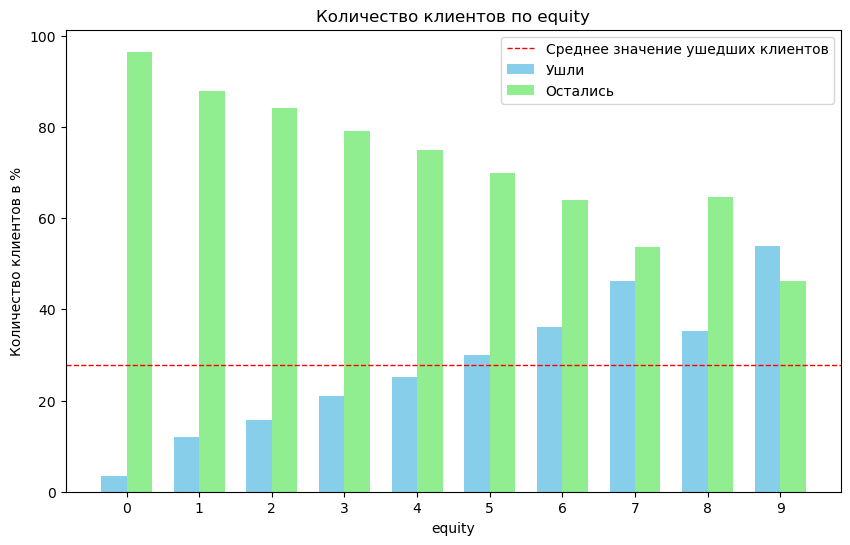

In [43]:
# Построим барплот по количеству баллов собственности
plot_2_bar(equity, 'churn_perc', 'stay_perc', 'equity', 'equity')

**Вывод:**
Уровень оттока клиентов с баллом собственности > 5 выше среднего уровня оттока по банку

##### Построим столбчатую диаграмму по количеству продуктов в разрезе оттока 

In [44]:
# Построим сводную таблицу по продуктам
products = pivot_table(data, 'products')
products

,products,stay,churn,total,stay_perc,churn_perc
0,0,NaN,1.00,NaN,NaN,NaN
1,1,3088.00,235.00,3323.00,92.93,7.07
2,2,4141.00,978.00,5119.00,80.89,19.11
3,3,741.00,297.00,1038.00,71.39,28.61
4,4,174.00,300.00,474.00,36.71,63.29
5,5,11.00,8.00,19.00,57.89,42.11


In [45]:
# Уберем строки с нулевым значением
products = products[products['products']!=0]
products

,products,stay,churn,total,stay_perc,churn_perc
1,1,3088.00,235.00,3323.00,92.93,7.07
2,2,4141.00,978.00,5119.00,80.89,19.11
3,3,741.00,297.00,1038.00,71.39,28.61
4,4,174.00,300.00,474.00,36.71,63.29
5,5,11.00,8.00,19.00,57.89,42.11


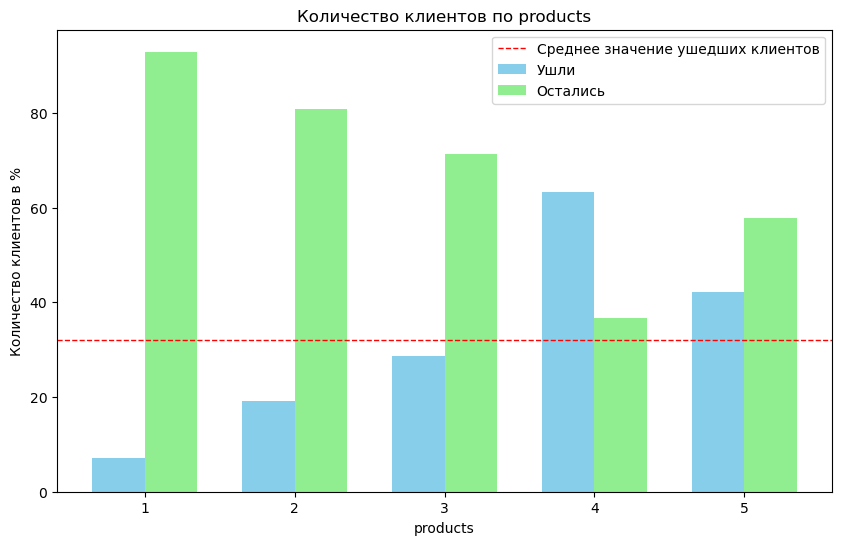

In [46]:
# Построим барплот по продуктам
plot_2_bar(products, 'churn_perc', 'stay_perc', 'products', 'products')

**Вывод:**
Уровень оттока клиентов количеством продуктов > 4 выше среднего уровня оттока по банку

##### Построим столбчатую диаграмму по наличию кредитных карт в разрезе оттока 

In [47]:
# Построим сводную таблицу по кредитным картам
credit_card = pivot_table(data, 'credit_card')
credit_card

,credit_card,stay,churn,total,stay_perc,churn_perc
0,0,2374,816,3190,74.42,25.58
1,1,5781,1003,6784,85.22,14.78


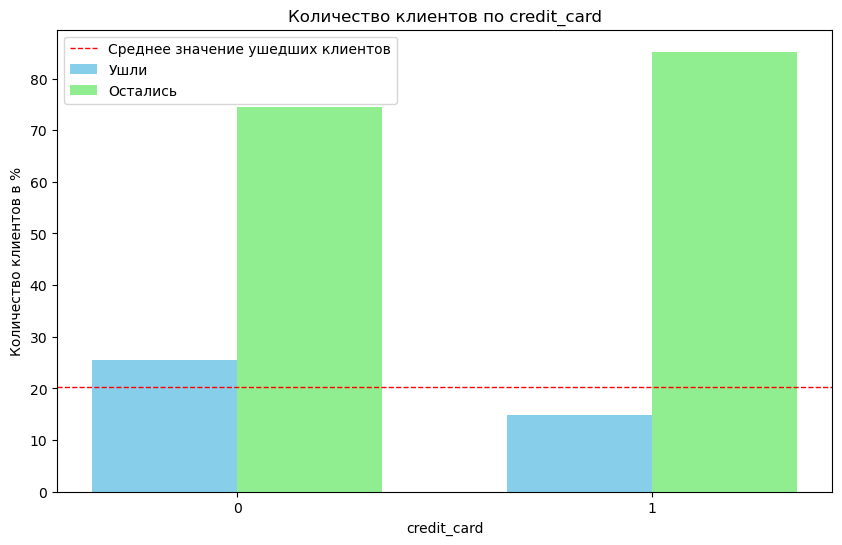

In [48]:
# Построим барплот по кредитным картам
plot_2_bar(credit_card, 'churn_perc', 'stay_perc', 'credit_card', 'credit_card')

**Вывод:**
Уровень оттока клиентов без кредитной карты немного выше, чем средний уровень оттока по банку

##### Построим столбчатую диаграмму по последнай активности в разрезе оттока 

In [49]:
# Построим сводную таблицу по активности
last_activity = pivot_table(data, 'last_activity')
last_activity

,last_activity,stay,churn,total,stay_perc,churn_perc
0,0,4217,542,4759,88.61,11.39
1,1,3938,1277,5215,75.51,24.49


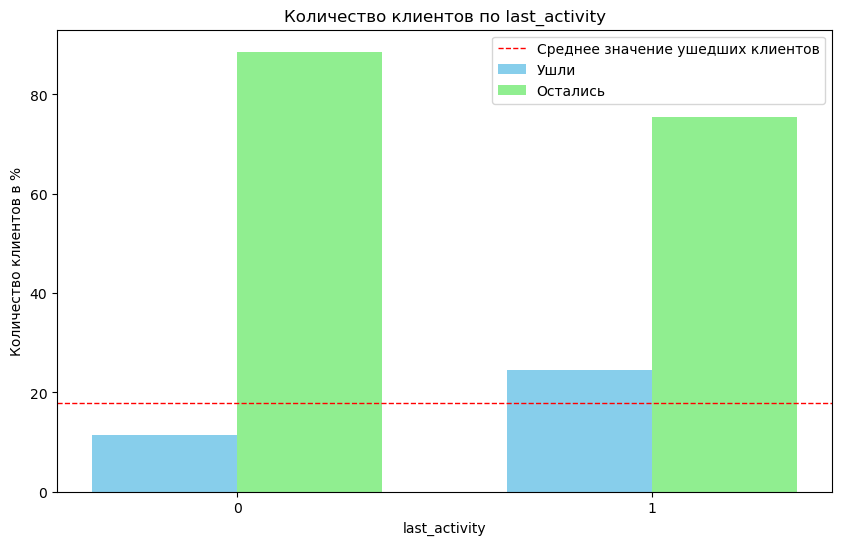

In [50]:
# Построим барплот по активности
plot_2_bar(last_activity, 'churn_perc', 'stay_perc', 'last_activity', 'last_activity')

**Вывод:**
Уровень оттока неактивных клиентов выше, чем средний уровень оттока по банку

##### Построим матрицу корреляции по отфильтрованным данным 

**Уберем выбросы по зарплате и балансу**

In [51]:
# Посчитаем 99-перцентили по зарплате и балансу
x_99 = data['est_salary'].quantile(.99)
y_99 = data['balance'].quantile(.99)
# Создадим датафрейм без 1 % выбросов
data_99 = data[(data['est_salary'] <= x_99) & (data['balance'] <= y_99)]
data_99.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,0
5,202305,856.00,Рыбинск,М,56.00,4,863687.24,3,1,0,156619.80,0,0


In [52]:
# Удилим стоблец user_id для матрицы корреляций
data_not_id_99 = data_99.drop(columns=['user_id'])

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'balance_missing']


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable balance_missing for analysis 1. Dropping this column
  warnings.warn(


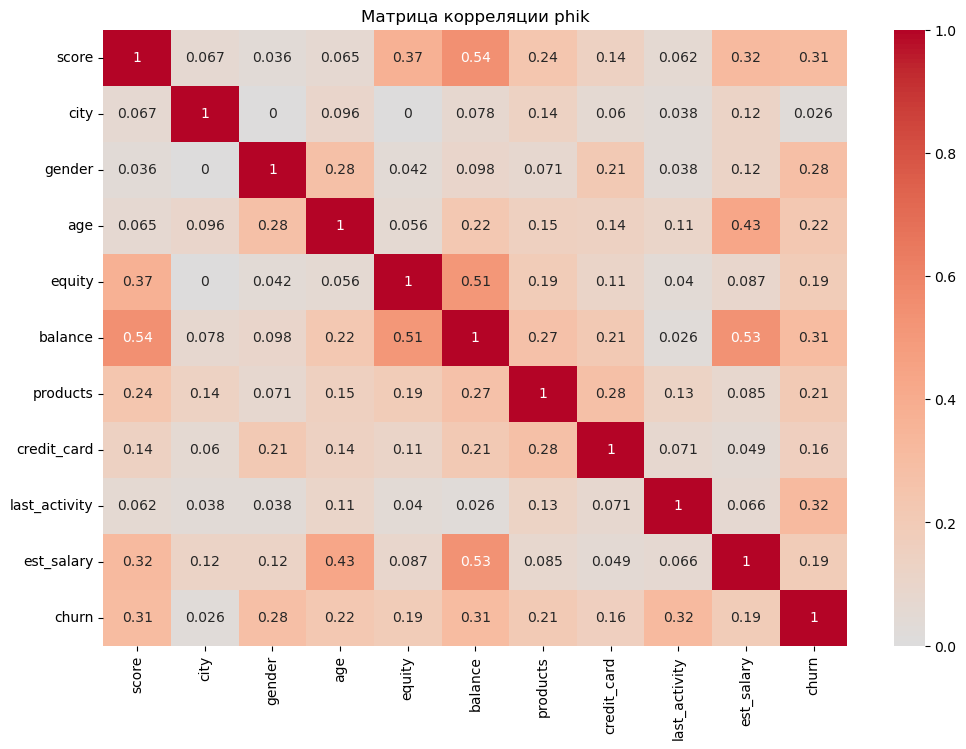

In [53]:
# Расчет матрицы корреляции phik
phik_matrix = data_not_id_99.phik_matrix()

# Визуализация матрицы корреляции в виде тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, center=0, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Матрица корреляции phik')
plt.show()

**Вывод:**

Корреляция по балансу

- кредитный рейтинг: 0.54
- доход: 0.53
- балл собственности: 0.51
- отток: 0.31

Корреляция по полу:

- возраст: 0.28
- кредитная карта: 0.21

Корреляция по возрасту:

- доход: 0.43
- баланс: 0.22

Корреляция по кредитному рейтингу:

- баланс: 0.54
- балл собственности: 0.37
- доход: 0.32
- продукты: 0.24

Корреляция продуктам:

- кредитная карта: 0.28
- баланс: 0.27
- крединтый рейтинг: 0.24
- балл собственности: 0.19

Корреляция по активности:

- отток: 0.32




interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'balance_missing']


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable balance_missing for analysis 1. Dropping this column
  warnings.warn(


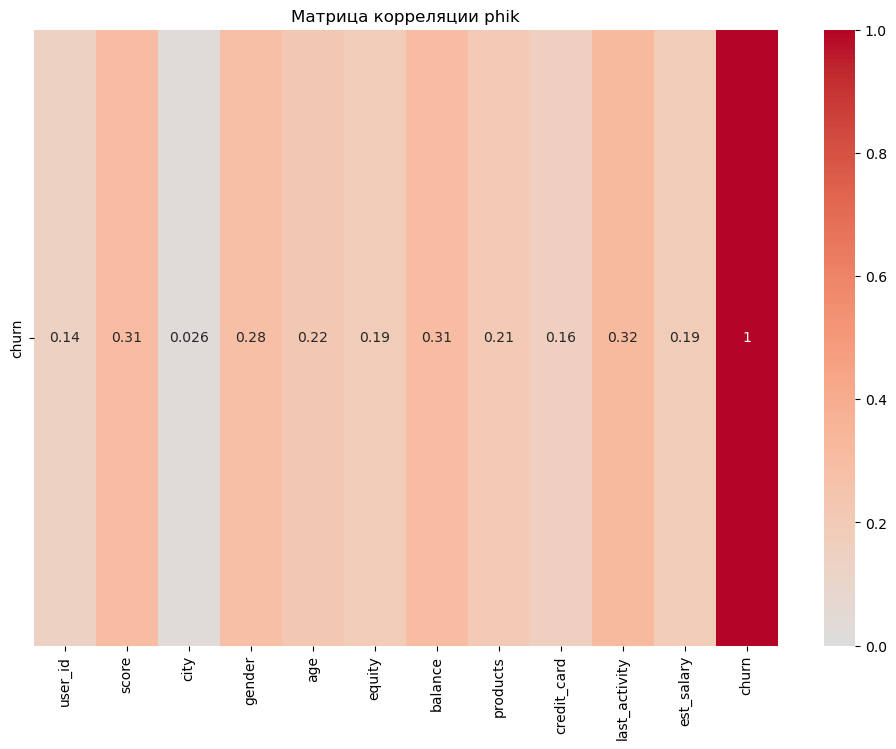

In [54]:
# Расчет матрицы корреляции phik
phik_matrix = data_99.phik_matrix()

# Визуализация матрицы корреляции в виде тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix.loc[['churn']], annot=True, center=0, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Матрица корреляции phik')
plt.show()

- Самая большая корреляция по оттоку связана с кредитным рейтингом (0.31), балансом (0.31) и последней активностью (0.32)
- Также имеется корреляция по оттоку с полом (0.28), возрастом (0.22), количеством банковских продуктов (0.21), доходом (0.19), баллом собственности (0.19)
- Корреляция по городу очень мала (0.026)

##### Создадим портрет клиента

In [55]:
# Вычисляем статистики для ушедших клиентов
churned_score_mean = churned['score'].mean()
churned_city_mode = churned['city'].mode()[0]
churned_gender_mode = churned['gender'].mode()[0]
churned_age_median = churned['age'].median()
churned_equity_median = churned['equity'].median()
churned_balance_mean = churned['balance'].mean()
churned_balance_median = churned['balance'].median()
churned_products_median = churned['products'].median()
churned_credit_card_mode = churned['credit_card'].mode()[0]
churned_last_activity_mode = churned['last_activity'].mode()[0]
churned_est_salary_mean = churned['est_salary'].mean()
churned_est_salary_median = churned['est_salary'].median()
churned_balance_isna_sum = churned['balance_missing'].sum()

In [56]:
# Вычисляем статистики для оставшихся клиентов
stayed_score_mean = stayed['score'].mean()
stayed_city_mode = stayed['city'].mode()[0]
stayed_gender_mode = stayed['gender'].mode()[0]
stayed_age_median = stayed['age'].median()
stayed_equity_median = stayed['equity'].median()
stayed_balance_mean = stayed['balance'].mean()
stayed_balance_median = stayed['balance'].median()
stayed_products_median = stayed['products'].median()
stayed_credit_card_mode = stayed['credit_card'].mode()[0]
stayed_last_activity_mode = stayed['last_activity'].mode()[0]
stayed_est_salary_mean = stayed['est_salary'].mean()
stayed_est_salary_median = stayed['est_salary'].median()
stayed_balance_isna_sum = stayed['balance_missing'].sum()

In [57]:
# Создадим сводную таблицу
pivot_profile = pd.DataFrame({
    'Признак': ['Кредитный рейтинг', 'Город', 'Пол', 'Возраст', 'Балл объектов собственности',
                'Баланс', 'Количество продуктов', 'Кредитная карта', 'Активность',
                'Оценочный доход', 'Пропуски в балансе'],
    'Отток': [
        f"Среднее: {churned_score_mean:.2f}", 
        f"Мода: {churned_city_mode}", 
        f"Мода: {churned_gender_mode}",
        f"Медиана: {churned_age_median:.2f}", 
        f"Медиана: {churned_equity_median:.2f}",
        f"Среднее: {churned_balance_mean:.2f}, Медиана: {churned_balance_median:.2f}", 
        f"Медиана: {churned_products_median:.2f}",
        f"Мода: {churned_credit_card_mode}", 
        f"Мода: {churned_last_activity_mode}",
        f"Среднее: {churned_est_salary_mean:.2f}, Медиана: {churned_est_salary_median:.2f}", 
        f"Количество: {churned_balance_isna_sum}"
    ],
    'Не отток': [
        f"Среднее: {stayed_score_mean:.2f}", 
        f"Мода: {stayed_city_mode}", 
        f"Мода: {stayed_gender_mode}",
        f"Медиана: {stayed_age_median:.2f}", 
        f"Медиана: {stayed_equity_median:.2f}",
        f"Среднее: {stayed_balance_mean:.2f}, Медиана: {stayed_balance_median:.2f}", 
        f"Медиана: {stayed_products_median:.2f}",
        f"Мода: {stayed_credit_card_mode}", 
        f"Мода: {stayed_last_activity_mode}",
        f"Среднее: {stayed_est_salary_mean:.2f}, Медиана: {stayed_est_salary_median:.2f}", 
        f"Количество: {stayed_balance_isna_sum}"
    ],
    'Относительная разница (для среднего)': [
        f"{churned_score_mean / stayed_score_mean:.2f}",
        None, None, None, None, 
        f"{churned_balance_mean / stayed_balance_mean:.2f}", 
        None, None, None,
        f"{churned_est_salary_mean / stayed_est_salary_mean:.2f}", 
        None
    ]
})

pivot_profile

,Признак,Отток,Не отток,Относительная разница (для среднего)
0,Кредитный рейтинг,Среднее: 863.42,Среднее: 845.40,1.02
1,Город,Мода: Ярославль,Мода: Ярославль,None
2,Пол,Мода: М,Мода: Ж,None
3,Возраст,Медиана: 39.00,Медиана: 40.00,None
4,Балл объектов собственности,Медиана: 4.00,Медиана: 3.00,None
5,Баланс,"Среднее: 1134458.21, Медиана: 783908.90","Среднее: 733031.63, Медиана: 475410.09",1.55
6,Количество продуктов,Медиана: 2.00,Медиана: 2.00,None
7,Кредитная карта,Мода: 1,Мода: 1,None
8,Активность,Мода: 1,Мода: 0,None
9,Оценочный доход,"Среднее: 148289.70, Медиана: 125395.22","Среднее: 147674.64, Медиана: 118227.60",1.00


**Вывод**
- Кредитный рейтинг:

Средний кредитный рейтинг у клиентов, ушедших и не ушедших, отличается незначительно (863.42 против 845.40), относительная разница составляет 1.02. Это может указывать на то, что кредитный рейтинг не является сильным показателем оттока.

- Город и пол:

Мода на город для всех клиентов - Ярославль, мода для гендера различается (М для ушедших и Ж для не ушедших). Это может указывать на то, что город не влияет на отток, но гендер может влиять.

- Возраст и балл объектов собственности:

Медианный возраст для ушедших клиентов ниже (39 против 40), что может указывать на то, что более молодые клиенты склонны к оттоку. Медиана по баллам объектов собственности также различается (4 против 3), что может указывать на разные уровни финансовой стабильности у этих групп клиентов.

 - Баланс:

Средний баланс у ушедших клиентов значительно выше (1,134,458.21 против 733,031.63), и медиана также значительно выше (783,908.90 против 475,410.09). Относительная разница составляет 1.55. Это может указывать на то, что клиенты с более высоким балансом склонны к оттоку.

- Количество продуктов, наличие кредитной карты и активности:

Медианное количество продуктов одинаково для обеих групп (2). Моды по наличию кредитной карты и активности также одинаковы для ушедших и не ушедших клиентов. Это может говорить о том, что эти признаки не сильно влияют на отток.

 - Оценочный доход:

Средний оценочный доход почти одинаков для обеих групп (148,289.70 против 147,674.64), относительная разница составляет 1.00. Медиана также близка (125,395.22 против 118,227.60). Это может указывать на то, что оценочный доход не является сильным показателем оттока.

- Пропуски в балансе:

У ушедших клиентов наблюдается 13 пропусков в балансе, в то время как у не ушедших клиентов пропусков значительно больше (2266). Это может говорить о том, что наличие пропусков в данных (в данном случае, в балансе) может быть связано с фактом оттока клиентов.

Исходя из этих наблюдений, можно делать предположения о влиянии различных признаков на отток клиентов. Например, высокий баланс на счете может быть показателем потенциального оттока, в то время как другие признаки, такие как возраст или наличие кредитной карты, могут иметь меньшее влияние.

### Проверка статистических гипотез

#### Сформируем первую гипотезу

H0: Доходы ушедших клиентов = средним доходам оставшихся клиентов

H1: Доходы ушедших клиентов > доходов оставшихся клиентов

##### Проверим исходные данные

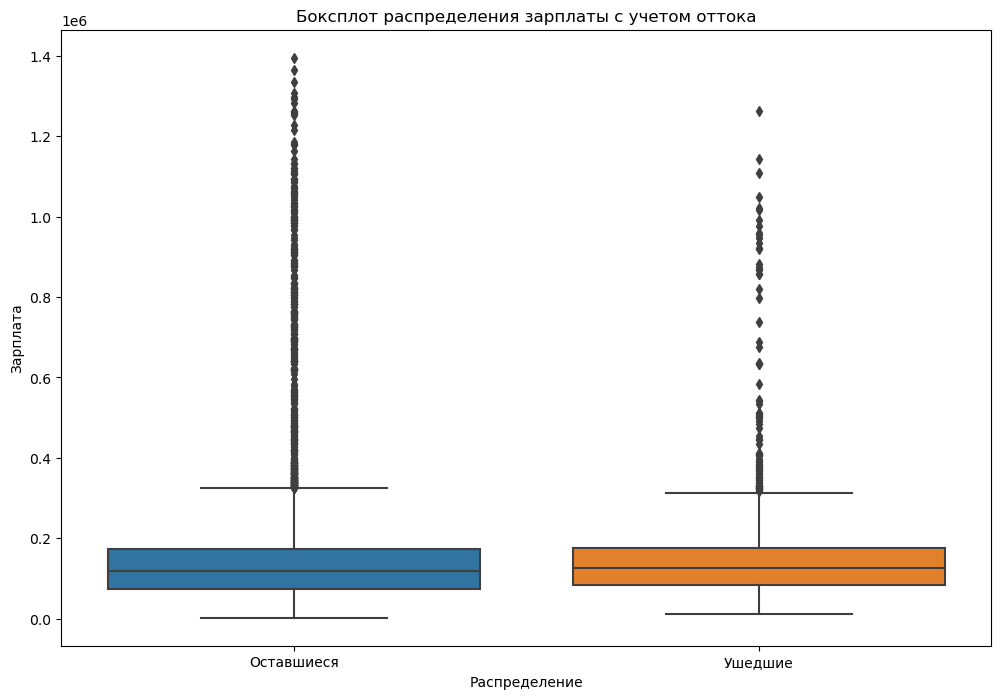

In [58]:
# Построим боксплоты по зарплате 
plt.figure(figsize=(12, 8))
sns.boxplot(x='churn', y='est_salary', data=data)
plt.title('Боксплот распределения зарплаты с учетом оттока')
plt.xlabel('Распределение')
plt.ylabel('Зарплата')
plt.xticks(ticks=[0, 1], labels=['Оставшиеся', 'Ушедшие'])
plt.show()

In [59]:
data['est_salary'].describe()

count      9974.00
mean     147786.81
std      139285.51
min        2546.30
25%       75251.66
50%      119626.79
75%      174499.81
max     1395064.45
Name: est_salary, dtype: float64

##### Отфильтруем данные

In [60]:
x_99_salary = data['est_salary'].quantile(.99)

In [61]:
# Уберем 1 % выбросов
data_99_salary = data[data['est_salary']<=x_99_salary]

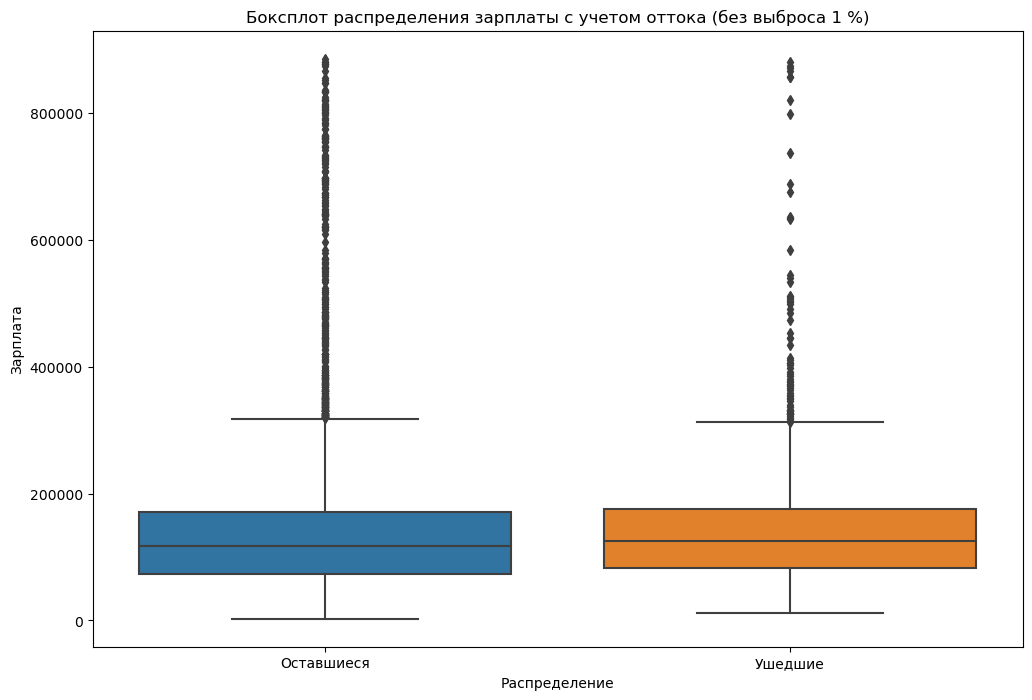

In [62]:
# Построим боксплоты по зарплате 
plt.figure(figsize=(12, 8))
sns.boxplot(x='churn', y='est_salary', data=data_99_salary)
plt.title('Боксплот распределения зарплаты с учетом оттока (без выброса 1 %)')
plt.xlabel('Распределение')
plt.ylabel('Зарплата')
plt.xticks(ticks=[0, 1], labels=['Оставшиеся', 'Ушедшие'])
plt.show()

**Выбросы все равно большие**

In [63]:
# Посчитаем перцентили по зарплате
x_96 = data_99_salary['est_salary'].quantile(.96)
x_97 = data_99_salary['est_salary'].quantile(.97)

In [64]:
# Разделим клиентов на ушедших и оставшихся
churned_test = data_99_salary.query('churn==1')
stayed_test= data_99_salary.query('churn==0')
print(f'Количество ушедших клиентов до фильтрации: {len(churned_test)}')
print(f'Количество оставшихся клиентов до фильтрации: {len(stayed_test)}')

Количество ушедших клиентов до фильтрации: 1805
Количество оставшихся клиентов до фильтрации: 8069


In [65]:
# Создадим временный датафрейм без выбросов 
churned_test = churned[churned['est_salary'] <= x_96]
stayed_test = stayed[stayed['est_salary'] <= x_95]
print(f'Количество ушедших клиентов после фильтрации: {len(churned_test)}')
print(f'Количество оставшихся клиентов после фильтрации: {len(stayed_test)}')

Количество ушедших клиентов после фильтрации: 1738
Количество оставшихся клиентов после фильтрации: 7738


##### Проверим нормальность распределения

In [66]:
# Сделаем тест Шапиро-Уилка на нормальность распределения

alpha = 0.05 

results = st.shapiro(churned_test['est_salary'])
p_value = results[1]

print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  8.040775242188706e-17
Отвергаем нулевую гипотезу: распределение не нормально


In [67]:
# Сделаем тест Шапиро-Уилка на нормальность распределения
alpha = 0.05 

results = st.shapiro(stayed_test['est_salary'])
p_value = results[1]

print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  2.7352880792530273e-38
Отвергаем нулевую гипотезу: распределение не нормально


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Вывод:**
- Поскольку распределения не нормальны, использование t-теста Стьюдента может быть не совсем корректным.
- Однако, t-тест Стьюдента более понятен для бизнеса, поэтому мы проведем оба теста.

##### Проверим равенство диспресий

In [68]:
# Сделаем проверку равенства дисперсий
levene_test = st.levene(churned_test['est_salary'], stayed_test['est_salary'])
p_value_levene = levene_test.pvalue
print('p-значение для теста Левене: ', p_value_levene)

p-значение для теста Левене:  0.022006743149724964


**Вывод:**
- Поскольку p-значение больше 0.05, мы не можем отвергнуть нулевую гипотезу о равенстве дисперсий. 
- Следовательно, для t-теста мы можем установить equal_var=True.
- Предположим, что наши данные достаточно велики, чтобы Центральная предельная теорема (ЦПТ) для ttest сработала

##### Выполним ttest

In [69]:
# Выполним t-теста
alpha = 0.05
equal_var = p_value_levene > alpha  

ttest_result = st.ttest_ind(churned_test['est_salary'], stayed_test['est_salary'], equal_var=equal_var, alternative='greater')
print('p-значение t-теста: ', ttest_result.pvalue)
if ttest_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Доходы ушедших клиентов больше доходов оставшихся клиентов')
else:
    print('Не получилось отвергнуть нулевую гипотезу: доходы ушедших клиентов равны доходам ушедших клиентов')

p-значение t-теста:  2.9761098723277856e-05
Отвергаем нулевую гипотезу: Доходы ушедших клиентов больше доходов оставшихся клиентов


##### Выполним тест Манна-Уитни

In [70]:
# Выполненим теста Манна-Уитни
mannwhitney_result = st.mannwhitneyu(churned_test['est_salary'], stayed_test['est_salary'], alternative='greater')
print('p-значение теста Манна-Уитни: ', mannwhitney_result.pvalue)
if mannwhitney_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Доходы ушедших клиентов больше доходов оставшихся клиентов')
else:
    print('Не получилось отвергнуть нулевую гипотезу: доходы ушедших клиентов равны доходам ушедших клиентов')

p-значение теста Манна-Уитни:  3.271552885584591e-06
Отвергаем нулевую гипотезу: Доходы ушедших клиентов больше доходов оставшихся клиентов


**Вывод:**
- На основании ttest и теста Манна-Уитни мы можем сделать вывод, что доходы ушедших клиентов больше доходов оставшихся клиентов

#### Сформируем вторую гипотезу

H0: Средний возраст ушедших клиентов = средний возраст оставшихся клиентов

H1: Средний возраст ушедших клиентов > средний возраст оставшихся клиентов

##### Проверим исходные данные

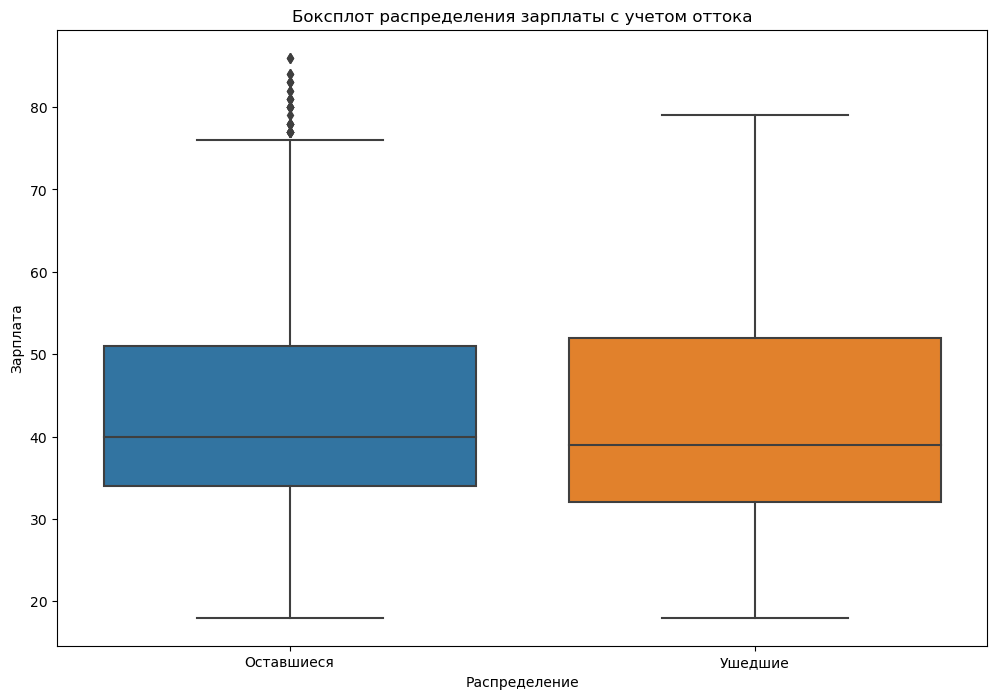

In [71]:
# Построим боксплоты по возрасту 
plt.figure(figsize=(12, 8))
sns.boxplot(x='churn', y='age', data=data)
plt.title('Боксплот распределения зарплаты с учетом оттока')
plt.xlabel('Распределение')
plt.ylabel('Зарплата')
plt.xticks(ticks=[0, 1], labels=['Оставшиеся', 'Ушедшие'])
plt.show()

In [72]:
data['age'].describe()

count   9974.00
mean      42.73
std       12.18
min       18.00
25%       33.00
50%       40.00
75%       51.00
max       86.00
Name: age, dtype: float64

##### Отфильтруем данные

In [73]:
# Разделим клиентов на ушедших и оставшихся
churned_test = data.query('churn==1')
stayed_test= data.query('churn==0')
print(f'Количество ушедших клиентов до фильтрации: {len(churned_test)}')
print(f'Количество оставшихся клиентов до фильтрации: {len(stayed_test)}')

Количество ушедших клиентов до фильтрации: 1819
Количество оставшихся клиентов до фильтрации: 8155


In [74]:
# Посчитаем перцентили по зарплате
x_99 = data['age'].quantile(.99)
x_99

73.0

In [75]:
# Создадим временный датафрейм без выбросов 

stayed_test = stayed[stayed['age'] <= x_99]
print(f'Количество ушедших клиентов после фильтрации: {len(churned_test)}')
print(f'Количество оставшихся клиентов после фильтрации: {len(stayed_test)}')

Количество ушедших клиентов после фильтрации: 1819
Количество оставшихся клиентов после фильтрации: 8073


##### Проверим нормальность распределения

In [76]:
# Сделаем тест Шапиро-Уилка на нормальность распределения данных по возрасту

alpha = 0.05 

results = st.shapiro(churned_test['age'])
p_value = results[1]

print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  8.347914636805095e-24
Отвергаем нулевую гипотезу: распределение не нормально


In [77]:
# Сделаем тест Шапиро-Уилка на нормальность распределения данных по возрасту

alpha = 0.05 

results = st.shapiro(stayed_test['age'])
p_value = results[1]

print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  6.628141736256385e-43
Отвергаем нулевую гипотезу: распределение не нормально


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Вывод:**
- Поскольку распределения не нормальны, использование t-теста Стьюдента может быть не совсем корректным.
- Однако, t-тест Стьюдента более понятен для бизнеса, поэтому мы проведем оба теста.

##### Проверим равенство диспресий

In [78]:
# Сделаем проверку равенства дисперсий
levene_test = st.levene(churned_test['age'], stayed_test['age'])
p_value_levene = levene_test.pvalue
print('p-значение для теста Левене: ', p_value_levene)

p-значение для теста Левене:  0.31494811246400983


**Вывод:**
- Поскольку p-значение больше 0.05, мы не можем отвергнуть нулевую гипотезу о равенстве дисперсий. 
- Следовательно, для t-теста мы можем установить equal_var=True.
- Предположим, что наши данные достаточно велики, чтобы Центральная предельная теорема (ЦПТ) для ttest сработала

##### Выполним ttest

In [79]:
# Выполним t-теста
alpha = 0.05
equal_var = p_value_levene > alpha  

ttest_result = st.ttest_ind(churned_test['age'], stayed_test['age'], equal_var=equal_var, alternative='greater')
print('p-значение t-теста: ', ttest_result.pvalue)
if ttest_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Возраст ушедших клиентов больше возраста оставшихся клиентов')
else:
    print('Не получилось отвергнуть нулевую гипотезу: возраст ушедших клиентов равен возрасту оставшихся клиентов')

p-значение t-теста:  0.9999676215838564
Не получилось отвергнуть нулевую гипотезу: возраст ушедших клиентов равен возрасту оставшихся клиентов


##### Выполним тест Манна-Уитни

In [80]:
# Выполненим теста Манна-Уитни
mannwhitney_result = st.mannwhitneyu(churned_test['age'], stayed_test['age'], alternative='greater')
print('p-значение теста Манна-Уитни: ', mannwhitney_result.pvalue)
if mannwhitney_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Возраст ушедших клиентов больше возраста оставшихся клиентов')
else:
    print('Не получилось отвергнуть нулевую гипотезу: возраст ушедших клиентов равен возрасту оставшихся клиентов')

p-значение теста Манна-Уитни:  0.9999606590527812
Не получилось отвергнуть нулевую гипотезу: возраст ушедших клиентов равен возрасту оставшихся клиентов


**Вывод:**
- На основании ttest и теста Манна-Уитни мы можем сделать вывод, что возраст ушедших клиентов равен возрасту оставшихся клиентов

### Подведение промежуточных итогов

*Исследовательский анализ данных*

- Кредитный рейтинг имеет влияние на отток клиентов.
- Баланс: Клиенты с более высоким балансом склонны к оттоку.
- Город: Большинство ушедших и неушедших клиентов живут в Ярославле
- Активность влияет на отток
- Среди ушедших клиентов больше мужчин, среди оставшихся – больше женщин.
- Возраст умеренно влияет на отток
- Количество продуктов умеренно влияет на отток.
- Баллы объектов собственности умеренно влияет на отток.
- Оценочный доход не сильно влияет на отток.

*Корреляция*

- Баланс: Имеет сильную корреляцию с кредитным рейтингом, доходом, баллом собственности
- Пол: Имеет умеренную корреляцию с возрастом и наличием кредитной карты.
- Возраст: Имеет умеренную кореляцию по доходу и балансу
- Кредитный рейтинг: имеет сильную корреляцию по балансу.ю умеренную корреляцию по баллу собственности, доходу, продуктам
- Продукты: Имеет умеренную корреляцию с крелитной картой, балансом, баллом собственности.
- Активность: Имеет умеренную корреляцию с оттоком.
- Отток: Имеет умеренную корреляцию с кредитным рейтингом, балансом, активностью, полом, продуктами

*Основные факторы оттока: Кредитный рейтинг, баланс и последняя активность.*


*Гипотезы и тесты*

- Доходы ушедших клиентов больше доходов оставшихся клиентов.
- Возраст ушедших клиентов равен возрасту оставшихся клиентов.



### Сегментация клиентов 


- Сегментация клиентов проводится на основании выявленных значимых признаков, влияющих на отток.
- Цель сегментации – выделить группы клиентов с высоким уровнем оттока, чтобы разработать целенаправленные мероприятия по их удержанию.


**Выделение признаков, влияющих на отток**

- Баланс: Клиенты с более высоким балансом склонны к оттоку.
- Кредитный рейтинг: Клиенты с высоким кредитным рейтингом более склонны к оттоку.
- Последняя активность: Клиенты с меньшей активностью более склонны к оттоку.
- Город: Большинстов ушедших клиентов живут в Ярославле
- Доход: Клиенты с большим доходом могут быть склонны к оттоку.
- Пол: Пол может оказывать влияние на отток, с большей склонностью к оттоку у мужчин.
- Количество продуктов: клиенты с большим количеством продуктов могут иметь склонность к оттоку

**Выбор признаков для сегментации** 
- Баланс
- Кредитный рейтинг
- Активность
- Город
- Доход
- Пол

**Сегменты клиентов**

**Сегмент 1: Высокий баланс и низкая активность**

*Признаки:*

- Баланс: > 800,000
- Последняя активность: = 1

**Сегмент 2: Мужчины с высоким уровнем дохода**

*Признаки:*

- Пол: Мужской
- Возраст: доход > 125000 руб.


**Сегмент 3: г. Ярославль и высокий кредитный рейтинг**

*Признаки:*

- Кредитный рейтинг: > 800
- г. Ярославль 


In [81]:
# Создадим сегмент для тех, у кого высокий баланс и низкая активность
data_segment_1 = data[(data['balance'] > 800000) & (data['last_activity'] == 1)]
print('Общее количество клиентов в этом сегменте в целом по банку: ', data_segment_1['user_id'].count())

# Создадим сегмент для отточных клиентов
data_segment_1_churned = churned[(churned['balance'] > 800000) & (churned['last_activity'] == 1)]
print('Общее количество отточных клиентов в этом сегменте: ', data_segment_1_churned['user_id'].count())

# Посчитаем уровень оттока
churn_rate = round(data_segment_1_churned['user_id'].count()/data_segment_1['user_id'].count(), 2)
print('Уровень оттока клиентов в этом сегменте: ', churn_rate)

Общее количество клиентов в этом сегменте в целом по банку:  1318
Общее количество отточных клиентов в этом сегменте:  643
Уровень оттока клиентов в этом сегменте:  0.49


In [82]:
# Создадим сегмент для мужчин с высоким доходом
data_segment_2 = data[(data['gender'] == 'М') & (data['est_salary'] >= 125000)]
print('Общее количество клиентов в этом сегменте в целом по банку: ', data_segment_2['user_id'].count())

# Создадим сегмент для отточных клиентов
data_segment_2_churned = churned[(churned['gender'] == 'М') & (churned['est_salary'] >= 125000)]
print('Общее количество отточных клиентов в этом сегменте: ', data_segment_2_churned['user_id'].count())

# Посчитаем уровень оттока
churn_rate = round(data_segment_2_churned['user_id'].count()/data_segment_2['user_id'].count(), 2)
print('Уровень оттока клиентов в этом сегменте: ', churn_rate)

Общее количество клиентов в этом сегменте в целом по банку:  2606
Общее количество отточных клиентов в этом сегменте:  606
Уровень оттока клиентов в этом сегменте:  0.23


In [83]:
# Создадим сегмент для тех, кто живет в Ярославле и имеет высокий кредитный рейтинг
data_segment_3 = data[(data['city'] == 'Ярославль') & (data['score'] > 800)]
print('Общее количество клиентов в этом сегменте в целом по банку: ', data_segment_3['user_id'].count())

# Создадим сегмент для отточных клиентов
data_segment_3_churned = churned[(churned['city'] == 'Ярославль') & (churned['score'] > 800)]
print('Общее количество отточных клиентов в этом сегменте: ', data_segment_3_churned['user_id'].count())

# Посчитаем уровень оттока
churn_rate = round(data_segment_3_churned['user_id'].count()/data_segment_3['user_id'].count(), 2)
print('Уровень оттока клиентов в этом сегменте: ', churn_rate)

Общее количество клиентов в этом сегменте в целом по банку:  4437
Общее количество отточных клиентов в этом сегменте:  994
Уровень оттока клиентов в этом сегменте:  0.22


### Приоритизация клиентов 

- На первом месте клиенты с высоким балансом и низкой активностью (доля оттока 0.49)
- На втором месте клиенты - мужчины с высоким уровнем дохода (доля оттока 0.23)
- На третьем месте клиенты - жителя Ярославля с высоким кредитным рейтингом (доля оттока 0.22)

### Формирование рекомендаций по работе с приоритетными сегментами

**1. Клиенты с высоким балансом и низкой активностью**

- Персональные предложения: создать специальные предложения, например, такие как повышенные процентные ставки по вкладам или скидки на банковские услуги.
- Уведомления и напоминания: автоматизировать отправку уведомлений и напоминаний, например, о возможностях инвестиций и других финансовых продуктах.
- Программы лоьяльности: разработать программы лояльности, которые вознаграждают клиентов за активное использование банковских услуг, например, начисление бонусных баллов.

**2. Клиенты - мужчины с высоким уровнем дохода**

- Информационная поддержка и помощь в получении консультационных услуг или персональный банковский менеджер. 
- Продвижение эксклюзивные инвестиционные продукты, такие как фонды с высоким доходом или портфельные инвестиции.
- Программы привилегий: включить в программы привилегий различные бонусы и специальные предложения, такие как доступ к VIP-зонам в аэропортах, скидки в ресторанах и на мероприятия.

**3. Клиенты - жители Ярославля с высоким кредитным рейтингом**

- Локальные мероприятия: организовывать локальные мероприятия, например семинары по финансовому планированию и инвестициям.
- Специальные условия по кредитам: предлагать льготные условия по кредитам, такие как более низкие процентные ставки и удлиненные сроки погашения.
- Партнерские программы: создать партнерские программы с местными бизнесами, такими как рестораны, магазины и спортивные клубы, чтобы предлагать скидки и специальные предложения..



ссылка на презентацию: https://drive.google.com/file/d/1AO7syrGgg3qN69yY88unmNdFuB90IvYE/view?usp=sharing